# ML-ASSIGNMENT 1

## Question 1 (TensorFlow)

MNIST (http://yann.lecun.com/exdb/mnist/) is a famous dataset and benchmark for pattern recognition. It contains images of hand written numbers that are normalized and centered in a 28x28 pixel array. The data set was derived from a NIST (National Institute of Standards and Technology) data set, hence the acronym for Modified NIST. There are many ways to load this data set. An easy way is to use routines from tensorflow to load 50 images into a Python tuple with 
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True);
batch = mnist.train.next_batch(50)

** Write a program that displays some of these examples.**

In [1]:
#Importing the tensorflow
import tensorflow as tf

In [2]:
from tensorflow.examples.tutorials.mnist import input_data 

mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


In [3]:
batch_X,batch_y = mnist.train.next_batch(1)

In [4]:
#Importing matplotlib to display images
import matplotlib.pyplot as plt
#For printing the plot
%matplotlib inline 

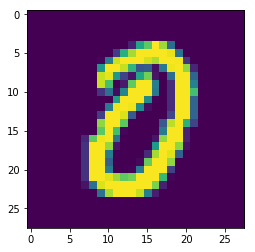

In [5]:
plt.imshow(batch_X.reshape(28,28))

In [6]:
mnist.train.images[2].shape

(784,)

In [7]:
img = mnist.train.images[2].reshape(28,28)

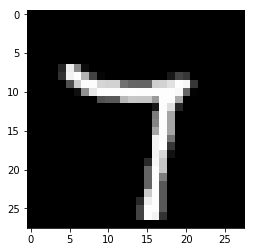

In [8]:
plt.imshow(img, cmap='gray')

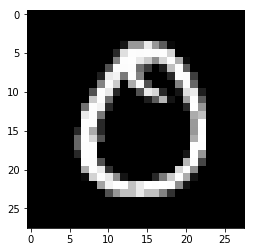

In [9]:
img2 = mnist.train.images[2043].reshape(28,28)
plt.imshow(img2, cmap='gray')

# Question 2 (Cross-Validation):

In the example code for the Iris data classification, we used 10-fold cross-validation to evaluate the accuracy of predictions with a linear SVM. In the example, we used the sklearn method model_selection.cross_val_score. 

**a. Explain briefly what k-fold cross validation is and what it is used for?**

In k-Fold cross validation, the training dataset is divided into k equal parts. Each subset is called fold. Now, keep kth fold as validation set and rest k-1 folds as corss-validation training set. After that, apply the machine learning model to validation training set and calculate the accuracy of the model by validating the predicted result with the validation set. This process is repeated for k-times. Finally, it estimates the average of the machine learning model by averaging the accuracy obtained in all the k classes of cross validation.

The application of k-fold crossvalidation are:
* It is helpful in comparing the performance of the different machine learning algorithms for the given data set,
* It is also helpful in tunning the hyper-parameters of the machine learning algorithm.
* It can also help to avoid the problem of machine learning algorithm to overfit the data.

** b. Write a script that does a k-fold cross-validation without using the cross_val_score function and compares the results with the sklearn function.**

In [11]:
#Ignoring warnings
import warnings
warnings.filterwarnings('ignore')
#Importing the numpy
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn import datasets 
iris = datasets.load_iris()
#Loading the data set:
X = iris.data
y = iris.target

#Creating objecy for SVM
from sklearn.svm import SVC
svc = SVC()

#Function for K-Fold:
from sklearn.cross_validation import KFold
kf = KFold(len(X),10,shuffle = True,random_state=100)
arr_mean = []

for train_index, test_index in kf:
    #print("Train INdex:", train_index,"test index:",test_index)
    
    svc.fit(X[train_index], y[train_index])
    prd = svc.predict(X[test_index])
    acc_mean = accuracy_score(y[test_index], prd) 
    arr_mean.append(acc_mean)
arr_mn = np.array(arr_mean).mean()

print ('Accuracy for Kfold script is: %.3f'%(arr_mn*100) +'%')


Accuracy for Kfold script is: 96.667%


Now implementing the cross_val_score function for kfold cross validation.

In [12]:
from sklearn.cross_validation import cross_val_score
from sklearn.svm import SVC
svc = SVC()
arr_mean_cvs = cross_val_score(svc, X, y, cv = 10, scoring = 'accuracy')
arr_mn_cvs = arr_mean_cvs.mean()
print('Accuracy obtained using cross_val_score: %.3f'%(arr_mn_cvs*100) +'%')

Accuracy obtained using cross_val_score: 98.000%


As you can see the accuracy for SVM model using cross_val_score is better than the kfold function which we have used. Hence, cross validation method can be more quick and effcient option for the performance of our model as the model will get more and more data for training.

## Question 3

Please download the wine.zip file and extract it to the directory for this assignment. Read through the wine_names.txt file and come to understand the problem and the wine data contained in the wine.train dataset. Train one of the models SVM, MLP, or RF to develop the best possible model for classifying the wine data in the hold-out test data set of 58 records in the wine.test file given the training data. In other words, you must submit a list of 58 classifications (as a separate *.csv file) for the hold-out test set in the same order as received. We will use your answers to score how well your model performs.

In [13]:
#Importing the numpy
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
wtrain = np.loadtxt('wine.train', delimiter = ',')
wtrain_X = np.delete(wtrain,0,axis=1)
wtrain_y = wtrain[:,0]

wtest = np.loadtxt('wine.test',delimiter=',')
wtest_X =  np.delete(wtest,0,axis=1)
wtest_y = wtest[:,0]

In [14]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=30)
from sklearn.svm import SVC
svc = SVC(kernel='linear')
from sklearn.cross_validation import cross_val_score

svc_mean = cross_val_score(svc, wtrain_X, wtrain_y, cv = 10, scoring = 'accuracy')
svc_mn = svc_mean.mean()
print('Accuracy obtained using SVM: %.3f'%(svc_mn*100) +'%')

rfc_mean = cross_val_score(rfc, wtrain_X, wtrain_y, cv = 10, scoring = 'accuracy')
rfc_mn = rfc_mean.mean()
print('Accuracy obtained using RFC: %.3f'%(rfc_mn*100) +'%')



Accuracy obtained using SVM: 92.500%
Accuracy obtained using RFC: 98.333%


In [15]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

X=wtrain_X
y=wtrain_y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


y_train = y_train.astype(int)
#y_test = y_test.astype(int)


feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train)
MLP = tf.contrib.learn.DNNClassifier(feature_columns=feature_columns, hidden_units=[10, 20, 10], n_classes=4)

MLP.fit(X_train, y_train, steps=2000, batch_size=84)
pred = list(MLP.predict(X_test))
mlp_mn = accuracy_score(y_test,pred)
print ('')
print('Accuracy obtained using MLP: %.3f'%(mlp_mn*100) +'%')


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_environment': 'local', '_master': '', '_keep_checkpoint_every_n_hours': 10000, '_task_id': 0, '_is_chief': True, '_evaluation_master': '', '_log_step_count_steps': 100, '_save_checkpoints_secs': 600, '_save_summary_steps': 100, '_tf_random_seed': None, '_task_type': None, '_model_dir': 'C:\\Users\\dalal\\AppData\\Local\\Temp\\tmpw7yu4q80', '_num_worker_replicas': 0, '_session_config': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002342E472F98>, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_keep_checkpoint_max': 5, '_save_checkpoints_steps': None, '_num_ps_replicas': 0}
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCom

Accuracies for Various Classification Model are:
Support Vector Machine: 92.5
Random Forest: 98.33333333333331
Multi Layer Peceptrom: 94.44444444444444


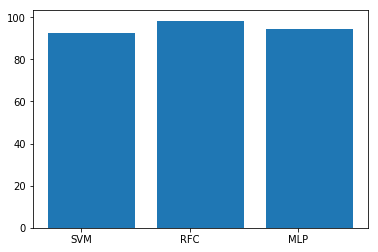

In [17]:
print ('Accuracies for Various Classification Model are:')
print ('Support Vector Machine:', svc_mn*100)
print ('Random Forest:', rfc_mn*100)
print ('Multi Layer Peceptrom:', mlp_mn*100)
ar= np.array([svc_mn*100,rfc_mn*100,mlp_mn*100])
x=['SVM','RFC','MLP']
y=[svc_mn*100,rfc_mn*100,mlp_mn*100]
nd = np.arange(3)
width=0.2
plt.xticks(nd-width/2., ('SVM','RFC','MLP'))
fig = plt.bar(nd, y)

plt.show()

The first step for selecting the best model was to tune the parameter of each model. The approach for tunning the parameter of each was trial and error. Once the parameter was tuned, each model was applied on the data set using cross validation technique and then for each model, accuracy was calculated.  The  Random Forest Classifier (RFC) was the best performer among the varisous classification algortihm such as Support Vector Machine (SVM), and Multi Layer Perceptron (MLP). The accuracy was the measure considerd to choose the best among them. As can see from the plot, RFC has the highest accuracy and hence it is selected as best classification algorithm for wine dataset.

In [18]:
rfc.fit(wtrain_X,wtrain_y)
pred = rfc.predict(wtest_X)
np.savetxt('pred_wine.csv',pred)